In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report


In [2]:
ds=pd.read_csv(r'C:\Users\Kanneluri SanghavRao\Downloads\dsp_45_mock_assessment_sangavi\customer_details.csv')

In [3]:
ds.shape

(10127, 21)

In [4]:
ds.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
ds.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [6]:
ds.sample(50)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4272,794707083,Attrited Customer,50,M,2,College,Single,$80K - $120K,Blue,44,...,2,4,3495.0,0,3495.0,0.639,2131,41,0.464,0.000
6667,711389358,Attrited Customer,42,M,3,Graduate,Married,$40K - $60K,Blue,23,...,3,2,5791.0,2517,3274.0,0.690,2516,64,0.641,0.435
5336,714706083,Existing Customer,44,M,2,College,Married,$60K - $80K,Blue,36,...,3,4,12229.0,997,11232.0,0.811,4284,75,0.596,0.082
1960,772202058,Existing Customer,64,M,0,Graduate,Married,Less than $40K,Blue,53,...,3,4,2084.0,1647,437.0,0.664,1597,37,0.542,0.790
9234,717565233,Existing Customer,51,M,3,Doctorate,Single,$80K - $120K,Blue,38,...,3,2,31346.0,1318,30028.0,0.862,13303,92,0.804,0.042
6854,712285908,Existing Customer,60,F,1,High School,Single,Less than $40K,Blue,49,...,4,1,2481.0,1925,556.0,0.723,5228,73,0.780,0.776
6832,779961408,Existing Customer,58,F,1,Uneducated,Single,Less than $40K,Blue,43,...,4,2,3382.0,1446,1936.0,0.705,4854,74,0.682,0.428
5406,721109358,Existing Customer,39,M,3,High School,Married,$60K - $80K,Blue,27,...,2,1,2583.0,0,2583.0,0.781,4162,87,0.812,0.000
3523,716431833,Existing Customer,38,M,2,Unknown,Divorced,$40K - $60K,Blue,28,...,3,4,11209.0,1165,10044.0,0.966,4614,96,0.714,0.104
5730,712237458,Existing Customer,47,M,3,Unknown,Married,$120K +,Blue,28,...,2,2,11629.0,802,10827.0,0.912,3752,78,0.902,0.069


In [7]:
ds.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
ds.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [10]:
ds.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [11]:
ds.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [12]:
ds.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [13]:
ds['CLIENTNUM'].unique()

array([768805383, 818770008, 713982108, ..., 716506083, 717406983,
       714337233], dtype=int64)

In [14]:
ds['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [15]:
ds['Customer_Age'].unique()

array([45, 49, 51, 40, 44, 32, 37, 48, 42, 65, 56, 35, 57, 41, 61, 47, 62,
       54, 59, 63, 53, 58, 55, 66, 50, 38, 46, 52, 39, 43, 64, 68, 67, 60,
       73, 70, 36, 34, 33, 26, 31, 29, 30, 28, 27], dtype=int64)

In [16]:
ds['Gender'].unique()

array(['M', 'F'], dtype=object)

In [17]:
ds['Dependent_count'].unique()

array([3, 5, 4, 2, 0, 1], dtype=int64)

In [18]:
ds['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [19]:
ds['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [20]:
ds['Months_on_book'].unique()

array([39, 44, 36, 34, 21, 46, 27, 31, 54, 30, 48, 37, 56, 42, 49, 33, 28,
       38, 41, 43, 45, 52, 40, 50, 35, 47, 32, 20, 29, 25, 53, 24, 55, 23,
       22, 26, 13, 51, 19, 15, 17, 18, 16, 14], dtype=int64)

In [21]:
ds.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Text(0, 0.5, 'Avg_Utilization_Ratio')

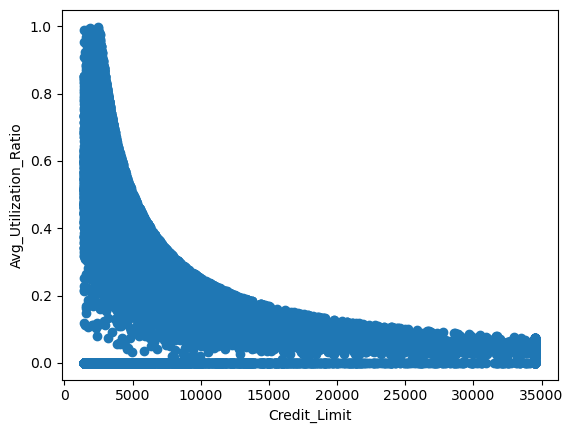

In [22]:
plt.scatter(ds.Credit_Limit,ds.Avg_Utilization_Ratio)
plt.xlabel('Credit_Limit')
plt.ylabel('Avg_Utilization_Ratio')

In [23]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
y_predicted=model.fit_predict(ds[['Credit_Limit','Avg_Utilization_Ratio']])
y_predicted

C:\Users\Kanneluri SanghavRao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 0, 0, ..., 0, 0, 2])

In [24]:
ds['cluster']=y_predicted

In [25]:
ds.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,cluster
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,2
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [26]:
model.cluster_centers_

array([[3.68189265e+03, 3.64119749e-01],
       [3.08854518e+04, 4.01749298e-02],
       [1.40252162e+04, 9.02638821e-02]])

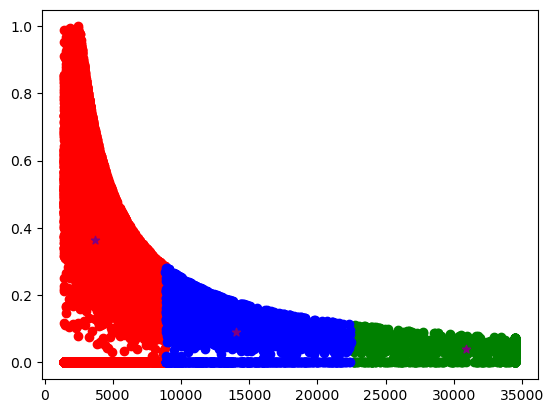

In [27]:
ds1=ds[ds.cluster==0]
ds2=ds[ds.cluster==1]
ds3=ds[ds.cluster==2]

plt.scatter(ds1['Credit_Limit'],ds1['Avg_Utilization_Ratio'],color='red')
plt.scatter(ds2['Credit_Limit'],ds2['Avg_Utilization_Ratio'],color='green')
plt.scatter(ds3['Credit_Limit'],ds3['Avg_Utilization_Ratio'],color='blue')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*')

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
ds['Credit_Limit']=scaler.fit_transform(ds[['Credit_Limit']])
ds['Avg_Utilization_Ratio']=scaler.fit_transform(ds[['Avg_Utilization_Ratio']])

In [29]:
ds.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,cluster
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,0.340190,777,11914.0,1.335,1144,42,1.625,0.061061,2
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,0.206112,864,7392.0,1.541,1291,33,3.714,0.105105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,0.059850,0,3418.0,2.594,1887,20,2.333,0.000000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,0.056676,2517,796.0,1.405,1171,20,2.333,0.760761,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,0.099091,0,4716.0,2.175,816,28,2.500,0.000000,0


In [30]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
y_predicted=model.fit_predict(ds[['Credit_Limit','Avg_Utilization_Ratio']])
y_predicted

C:\Users\Kanneluri SanghavRao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, ..., 1, 1, 1])

In [31]:
ds['Clusters']=y_predicted

In [32]:
ds

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,cluster,Clusters
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,0.340190,777,11914.0,1.335,1144,42,1.625,0.061061,2,1
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0.206112,864,7392.0,1.541,1291,33,3.714,0.105105,0,1
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0.059850,0,3418.0,2.594,1887,20,2.333,0.000000,0,1
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0.056676,2517,796.0,1.405,1171,20,2.333,0.760761,0,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0.099091,0,4716.0,2.175,816,28,2.500,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,0.077536,1851,2152.0,0.703,15476,117,0.857,0.462462,0,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0.085819,2186,2091.0,0.804,8764,69,0.683,0.511512,0,0
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0.120042,0,5409.0,0.819,10291,60,0.818,0.000000,0,1
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0.116172,0,5281.0,0.535,8395,62,0.722,0.000000,0,1


In [33]:
model.cluster_centers_

array([[0.04023693, 0.61990878],
       [0.16418541, 0.11414768],
       [0.78179739, 0.04625035]])

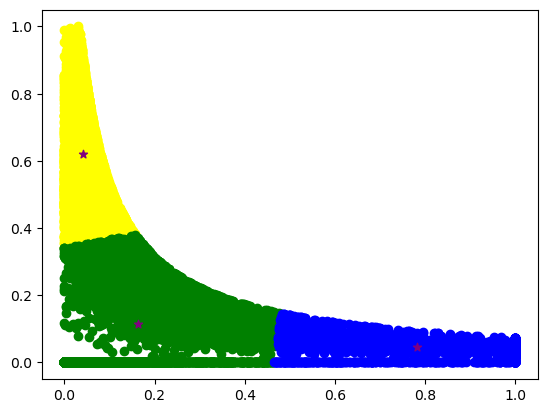

In [34]:
ds1=ds[ds.Clusters==0]
ds2=ds[ds.Clusters==1]
ds3=ds[ds.Clusters==2]

plt.scatter(ds1['Credit_Limit'],ds1['Avg_Utilization_Ratio'],color='yellow')
plt.scatter(ds2['Credit_Limit'],ds2['Avg_Utilization_Ratio'],color='green')
plt.scatter(ds3['Credit_Limit'],ds3['Avg_Utilization_Ratio'],color='blue')



plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*')

In [35]:
sse=[]
k_range=range(1,10)
for i in k_range:
    model=KMeans(n_clusters=i)
    model.fit(ds[['Credit_Limit','Avg_Utilization_Ratio']])
    sse.append(model.inertia_)

C:\Users\Kanneluri SanghavRao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kanneluri SanghavRao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kanneluri SanghavRao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kanneluri SanghavRao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

Text(0, 0.5, 'sum of squared errors')

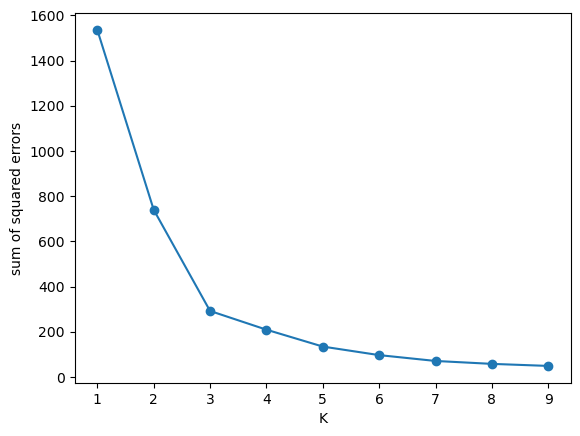

In [36]:
plt.scatter(k_range,sse)
plt.plot(k_range,sse)
plt.xlabel('K')
plt.ylabel('sum of squared errors')

In [37]:
#optimal value for k=3